In [1]:
from digits_module import Digit
from sample_class_module import Sample
from perspective_module import Perspective
from associations_module import Associations

So, I came up with an algorithm for image recognition that doesn't involve any learning or modeling. I wrote about the intuition behind everything I was doing, which you can find in the [how it works](https://xaenr.com/how-it-works). It is not yet completed it yet but I will soon. If you went through it, you have an idea about the theory behind the approach.

In this discussion, I will be taking you through the classes, and the methods that you could use to experiment on what I have done and hopefully add or modify a few things to make it more robust, efficient, and able to handle bigger images

In summary, the whole thing was done using the following steps;
1. Get a two dimensional array to represent the sample
2. Transform the element values in the array
3. Generate an array of Perspectives corresponding to the original sample
4. Compare the arrays of perspectives. This is analogous to comparing two samples

Throughout this discussion, you'll notice I'll be using terms such as "sample", "element", among other terms a lot. Here's their definition;
* **sample**: a two dimensional array of numbers. Could be obtained from a picture or any other source
* **element**: a point in the two dimensional array I have mentioned above. An example of an element is (1, 1)
* **angle**: I have used angle and orientation interchangeably. Whenever you see "angle" think of orientation, as it only shows how verticle or horizontal an element is

## Step 1: Get the two dimensional array

There's nothing much to say here.

For the website, these were the doodles. Soon, it will be big images. For testing, I used MNIST digits extensively. I developed two classes; **Digit** from *digits_module* that uses data from MNIST and **Sample** from *sample_class_module*.

### 1.1 Getting a sample digit

The default digit is zero

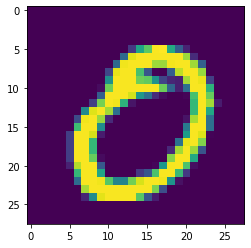

In [2]:
my_digit = Digit()
my_digit.show()

You are allowed to pick a different digit

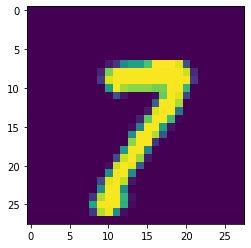

In [3]:
my_digit = Digit(7)
my_digit.show()

Or a different sample of the same digit

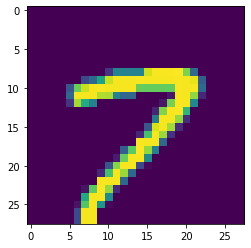

In [4]:
my_digit = Digit(7, 10)
my_digit.show()

We will be using the two-dimensional array for the rest of the process though, so that's really what we need. Here, I extract the two dimensional array.set

I should mention that I have created a lot of methods such as the *Digit.show()* used above just to guide in viewing what is currently being done. We can use that to judge whether whatever we are doing is providing the kind of results we were expecting

In [5]:
digit_0 = my_digit.get_digit_array()
digit_0

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

## Step 2: Transforming element values

Recall from [this discussion](https://xaenr.com/how-it-works) that I need to make the elements related in a way that forces them to be mapped in a new image to regions that keep them as close as they were in the original image. One of the things that I did to enable this is through transforming element values by calculating "angle".

Another thing that happens here is that I am discarding all elements that are not an edge. These elements do not provide any information, and discarding them reduces the procesing power needed to perform the later stages

The class **Sample** from *sample_class_module* provides a lot of functionalities for this. Here are some of the examples

In [6]:
my_sample = Sample(my_digit.get_digit_array())

One of the main things that happen in the Sample object is conversion of the plain values into into values denoting orientation of the elements. When we do a `my_sample.show()`. We can see the orientation of each of the element making up the sample.

The dark purple are of horizontal orientation, while the yellow ones are of vertical orientation. The greenish values are of diagonal orientation

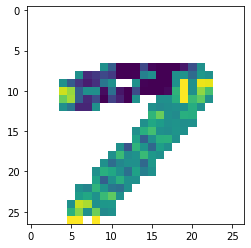

In [7]:
my_sample.show()

There's also a method to show to show the distribution of the orientation values above. From the figure below, we can see that most of the elements have a diagonal orientation (around 50). An orientation value of 1 represents vertical, while 0 means it is horizontal. In that regard, we also see that there are more elements with a horizontal orientation compared to those with vertical ones

If you are interested in the whys and hows regarding my calculations of the orientation, check out [this](https://github.com/VinceXIV/x--arctan-test) and [this](https://github.com/VinceXIV/x--arctan-test-2) repos

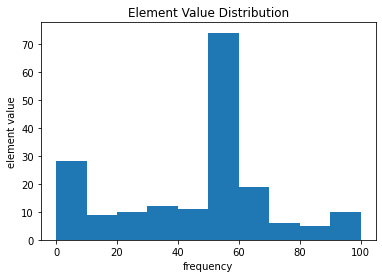

In [8]:
my_sample.summarize()

We could also thinify our samples. I did this this reduce the number of elements I have to work with because at this time the algorithm is computationally intensive, and that's one of the things I could do to reduce the operation. It is, however, not the ideal approach, and I'm still thinking of something to do

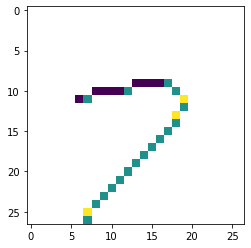

In [9]:
my_sample = Sample(my_digit.get_digit_array(), thinify=True)
my_sample.show()

## Step 3: Generating an Array of Perspectives

Recall that a perspective shows the image from the perspective of a single element. We create a perspective as shown below

In [10]:
# The element by which we will viewing the whole from its perspective
# The Sample object provides a method for getting all elements making it up, so I am using that and picking the first element
# In doing so, I am avoiding using, like the element (1, 1) which is not guaranteed to exist. See, during the transformation step
# above, we only used edges. All elements that did not represent an edge were discarded. Thus, they are not guaranteed to be
# part of the sample elements
refElement = my_sample.getSampleElements()[0]
digit_array = my_sample.get_digit_array() 

perspective1 = Perspective(refElement=refElement, sampleImage= digit_array, includeDistance=True)

The **Perspective** object, like some of the objects discussed up to this point, has some methods that help us know what is going on. Here are a few

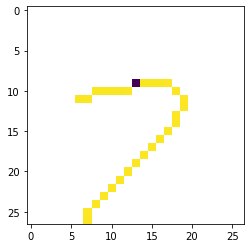

In [11]:
# Call this method to see our element. The whole (or part) of the whole sample will be seen from this element's perspective
perspective1.showElement()

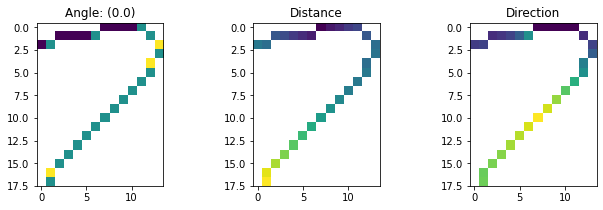

In [12]:
# In the first figure, the dark purple colors are elements whose angles are close to the angle of our reference element
# In the second figure, elements close to the reference element are purplish, while those further from it are yellow
# In the third image, diagnonal elements relative to the reference element are purplish.
# NOTE, in image 3 below, diagonal elements relative to the reference element are also diagonal, that is not always the case,
# take a look at the perspective shown next to see what is going on

perspective1.showPerspective()

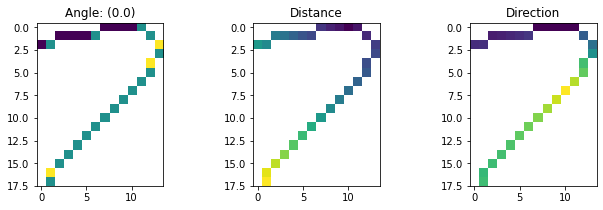

In [13]:
# The angle/orientation of the ref element in the sample above was 50. You can see it in the title fr the first image
# Since angles here range from 0 - 100 (you can set this while creating the Sample object), that makes its orientation to be diagonal
# As such, elements that sit diagonal with respect to it have the lowest difference. Take a look at the same figure below when we use
# an element with different orientation

refElement = my_sample.getSampleElements()[3]
digit_array = my_sample.get_digit_array() 

perspective2 = Perspective(refElement=refElement, sampleImage= digit_array, includeDistance=True)
perspective2.showPerspective()

The **Perspective** object also offers us a method to compare one perspective with another. So far we have created two perspectives from the sample we have. To recap, here are the two perspectives

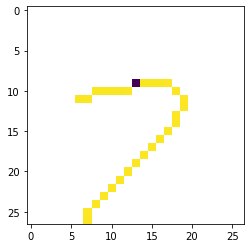

In [14]:
perspective1.showElement()

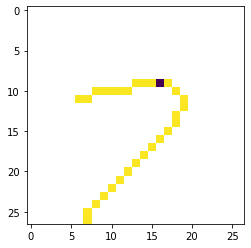

In [15]:
perspective2.showElement()

When we compare two perspectives, the result is another object of type **Compare** that also offers methods for examining the comparison results. Here's what I am talking about

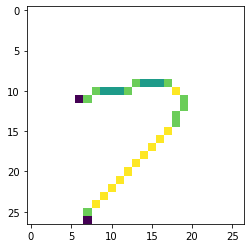

In [16]:
# First, lets compare a perspective by itself
# The purplish areas are the best match. This is what we expect.
# Since the element is at the edge, we expect it to better match the elements at the edge

comp = perspective1.compare(perspective1)
comp.showMatch()

Of the purple elements, there is one that matches the ref element the most based on the principles I discussed [here](https://xaenr.com/how-it-works).

The **Compare** objects has various methods to get the distance between the two perspective showing how similar or different they are. These methods include *getAverageCost*, *getMedianCost*, etc. Please explore the **Compare** class from *compare_module*

In [17]:
# Here's the result, we can see that perspective1 is same as perspective1. The distance/difference between them is zero 
comp = perspective1.compare(perspective1)
comp.getMedianCost()

0.0

In [18]:
# Here's the result, we can see that perspective1 is remarkably different from perspective2
comp = perspective1.compare(perspective2)
comp.getMedianCost()

36.0

So far, I have been rumbling about the **Perspective** object, and so I've said relatively nothing about the array of perspectives I was to talk about in this section. Well, with the information we have so far, all we need is to have a perspective for each of the element in that sample and our array of perspectives will be complete. I took care of that in the **Associations** object from the *associations_module*

There's more than the array of Perspectives in that object though if you've taken a look. There are two ways to compare samples in the associations module and that's by comparing an array of perspective against another, and the second method is through comparing the associations. Take a look at it to examine the diference

## Step 4: Compare the Arrays of Perspectives

I have briefly touched on the **Associations** class above. One of the things it does is that it enables us to create an array of perspectives and also handles how they are compared. We can create an **Associations** object as follows;

In [19]:
assoc1 = Associations(my_sample.get_digit_array())
assoc2 = Associations(my_sample.get_digit_array())

We can compare the **Associations** objects the same way we did the **Compare** object back, which we can examine including seeing what was matched into what

In [27]:
comp = assoc1.compare(assoc2)
comp.getMedianCost()

0.0

Here, I am examining what elements (read pixels) from assoc1 (sample1/image1) was matched into what elements of sample2. Since I was comparing the same elements (assoc1 == assoc2), you can see that all elements have been matched to themselves. element (9, 13) has been matched to (9, 13), (9, 14) has been matched to (9, 14), etc. 


In [21]:
comp.row_match

{(9, 13): (9, 13),
 (9, 14): (9, 14),
 (9, 15): (9, 15),
 (9, 16): (9, 16),
 (9, 17): (9, 17),
 (10, 8): (10, 8),
 (10, 9): (10, 9),
 (10, 10): (10, 10),
 (10, 11): (10, 11),
 (10, 12): (10, 12),
 (10, 18): (10, 18),
 (11, 6): (11, 6),
 (11, 7): (11, 7),
 (11, 19): (11, 19),
 (12, 19): (12, 19),
 (13, 18): (13, 18),
 (14, 18): (14, 18),
 (15, 17): (15, 17),
 (16, 16): (16, 16),
 (17, 15): (17, 15),
 (18, 14): (18, 14),
 (19, 13): (19, 13),
 (20, 12): (20, 12),
 (21, 11): (21, 11),
 (22, 10): (22, 10),
 (23, 9): (23, 9),
 (24, 8): (24, 8),
 (25, 7): (25, 7),
 (26, 7): (26, 7)}

Now, I try to compare two digits different digits by creating **Associations** object using them as samples. You can see that the match results are not as shown above, different elements from one samples were matched with elements at different positions in the other samplem

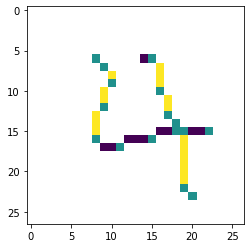

In [26]:
four = Digit(4).get_digit_array()
nine = Digit(9).get_digit_array()

four_thinified = Sample(four, thinify=True)
nine_thinified = Sample(nine, thinify=True)

four_thinified.show()

In [28]:
assoc_four = Associations(four_thinified.get_digit_array())
assoc_nine = Associations(nine_thinified.get_digit_array())

comp = assoc_four.compare(assoc_nine)
comp.getMedianCost()

10.56

As you can see from the result above, digits 4 and 9 are not as close to each other as 7 and 7 we got from above. That said, the primary approach to comparing that I did was getting the matching pattern.

By design, the algorithm works by mapping elements from one sample to another to determine the best match using the principles I discussed [in the how it works page (Xaenr)](https://xaenr.com/how-it-works). The stuff I did such as creating orientations/angles above, and creating perspective was to force the best match to have elements mapped to regions in another sample where most of its neighbors in its original sample have been mapped.

Let's take a look at mapping in comp

In [30]:
comp.row_match

{(7, 12): (15, 16),
 (7, 13): (15, 17),
 (7, 14): (15, 22),
 (8, 11): (7, 16),
 (8, 15): (16, 19),
 (9, 11): (8, 16),
 (9, 15): (17, 19),
 (10, 11): (9, 16),
 (10, 15): (11, 17),
 (11, 11): (7, 9),
 (11, 15): (16, 15),
 (12, 12): (13, 17),
 (12, 14): (16, 14),
 (13, 13): (6, 15),
 (13, 14): (15, 18),
 (14, 13): (14, 18),
 (14, 15): (15, 19),
 (15, 14): (6, 8),
 (16, 15): (10, 16),
 (17, 15): (12, 17),
 (18, 15): (17, 11),
 (19, 15): (9, 10),
 (20, 15): (12, 9),
 (21, 14): (16, 12),
 (22, 14): (16, 13),
 (23, 14): (21, 19),
 (24, 14): (16, 8)}

We can determine how close a sample is similar to another by checking how close elements that were neighbors in the original sample are in the new sample. In the case of the first comparison, we can see that for all elements their neighboring elements in the original sample were also their neighboring elements in the other sample after mapping. We can calculate the average distance of neighboring elements after mapping. The smaller this value is, the better the match